In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, norm, uniform

In [3]:
N = 10000
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(0, 1, N)

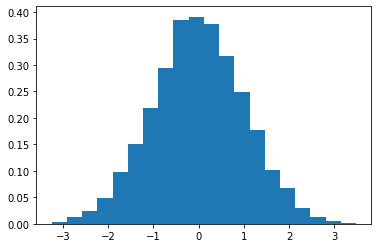

In [11]:
def normal (x1, x2):
    return np.sqrt(-2 * np.log(x1)) * np.cos(2 * np.pi * x2)

def plot_normal (x_normal):
    plt.hist(x_normal, bins=20, density=True)
    plt.show()


normal = np.random.normal(0, 1, N)
plot_normal(normal)


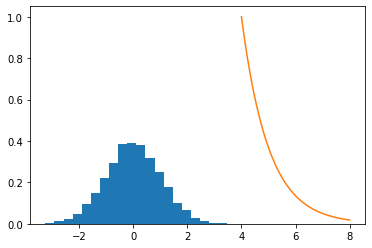

In [16]:
q = np.random.exponential(1, N) + 4  # Array de datos exponenciales e^X + 4

x = np.linspace(4, 8, 10000)
y = np.linspace(0, 1, 10000)

Nmc = 30000000
ux = np.random.uniform (-10, 10, Nmc)
uy = np.random.uniform (0, 1/np.sqrt(2*np.pi), Nmc)


def plot_qx (normal):
    plt.hist(normal, bins=20, density=True)
    plt.plot(x, expon.pdf(x, 4))
    # plt.plot(ux, uy, '.')
    plt.show()

plot_qx(normal)

In [17]:
# MONTE CARLO
ux_4 = np.where(ux > 4) #Indices de los valores mayores a 4
uy_4 = np.where(uy[ux_4] < norm.pdf(ux[ux_4], 0, 1))
area = len(uy_4[0]) / len(uy) * (20 * 1/np.sqrt(2*np.pi)) # 20*1/np.sqrt(2*np.pi) = area de las uniformes
print("Area con MC: ", area)

#Sergio
M = 1000000
f0 = 1/np.sqrt(2*np.pi)
x = 20 * np.random.rand(M, 1) - 10
y = f0 * np.random.rand(M, 1)

x4 = np.where(x > 4)
y4 = np.where(y[x4] < norm.pdf(x[x4], 0, 1))

AreaMC = len(y4[0]) / len(y) * f0 * 20
print("Area con MC: ", AreaMC)


w = (np.exp(-q**2/2) / np.sqrt(2 * np.pi)) / expon.pdf(q, 4)
areaIS = np.sum(w) / N

area = norm.sf(4) # P(X > 4)

print("Area con IS: ", areaIS)
print("Area sin IS: ", area)


Area con MC:  3.2447305472649864e-05
Area con MC:  3.989422804014327e-05
Area con IS:  3.188608402678943e-05
Area sin IS:  3.167124183311986e-05


Ep [p(x>4)] = integral (4, inf) p(x) dx    donde p(x) es la gausiana
-> integral (4, inf) p(x) dx  = integral (-inf, inf) p(x) I(x) dx = Ep [I]   donde I es el escalon en 4

-> Ep[I] = Eq [I p(x)/q(x)] = Eq [p(x)/q(x)]  donde q(x) es la expoencial desde 4

EJERCICIO:
Estimar la entropía de la uniforme (-3, 3) cuando las distribución que nos provee las muestras de una N(3,1)

sabemos que H = Ep [log2 (1/p(x))] = Eq [log2(1/p(x)) * p(x) / q(x)] dado que q(x) ~ N(3,1)
x ~ U(-3,3)

In [7]:
N = 10000
normal = np.random.normal(3, 1, N)

w = (np.log2 (6) * uniform.pdf(normal)) / (norm.pdf(normal, 3, 1))

w = []
for i in range(N):
    if uniform.pdf(normal[i], loc=-3, scale = 6 ) != 0:
        w.append((np.log2 (1/uniform.pdf(normal[i], loc=-3, scale = 6 )) * uniform.pdf(normal[i], loc=-3, scale=6)) / (norm.pdf(normal[i], 3, 1)))
    else:
        w.append(0)

h_IS = np.sum(w) / N

print("h_IS: ", h_IS)



#TEORICA
u = np.random.uniform(-3, 3, N)

def h_x(X, n_bins=5):
    x, edges = np.histogram(X, bins=n_bins)
    ancho = edges[1] - edges[0]
    p_x = (x/np.sum(x)) 
    h_x = 0
    for p in p_x:
    # - sumatoria p(x) log (p(x))
        if p != 0:
            h_x -= p * np.log2(p/ancho) 
    return h_x

print("h_X: ", h_x(u))


h_IS:  1.9875518997196453
h_X:  2.584508503177915
